# Chap6. 자유자재로 데이터 가공하기

- 06-1 데이터 전처리 - 원하는 형태로 데이터 가공하기(link)
- 06-2 조건에 맞는 데이터만 추출하기(link)
- 06-3 필요한 변수만 추출하기(link)
- 06-4 순서대로 정렬하기(link)
- 06-5 파생변수 추가하기(link)
- 06-6 집단별로 요약하기(link)
- 06-7 데이터 합치기(link)

# 6-1 데이터 전처리 -원하는 형태로 데이터 가공하기

- 수집된(주어진) 데이터를 원하는 형태로 변형하여 분석
- 데이터 전처리(Data Preprocessing) : 분석에 적합하게 데이터를 가공하는 작업

(동의어)
1. 데이터 전처리(Data Preprocessing)
1. 데이터 가공(Data manipulation) 
1. 데이터 핸들링(Data Handling) 
1. 데이터 랭글링(Data wrangling)
1. 데이터 먼징(Data Munging)
1. 데이터 클리닝(Data Cleaning)

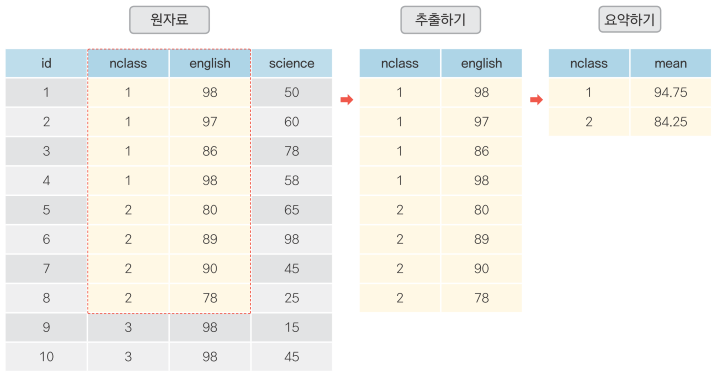

> 사용할 함수

|  함수          |  기능  |
| ---            | ----   |
| query()        | 행 추출 |
| df[]           | 열(컬럼, 변수) 추출 |
| sort_values()  | 정렬  |
| groupby()      | 집단별로 나누기 |
| assign()       | 변수 추가하기 |
| agg()          | 집단별 통계치 구하기 |
| merge()        | 데이터 합치기(열) |
| concat()       | 데이터 합치기(행) |


# 6-2 query() - 조건에 맞는 데이터 추출하기 / 숫자 변수
## Lab1. 반별(nclass) 데이터를 추출하여 작업해보자
- exam.query('nclass == 1')
- SQL : "SELECT * FROM exam WHERE nclass = 1"
- row를 줄이는 과정 

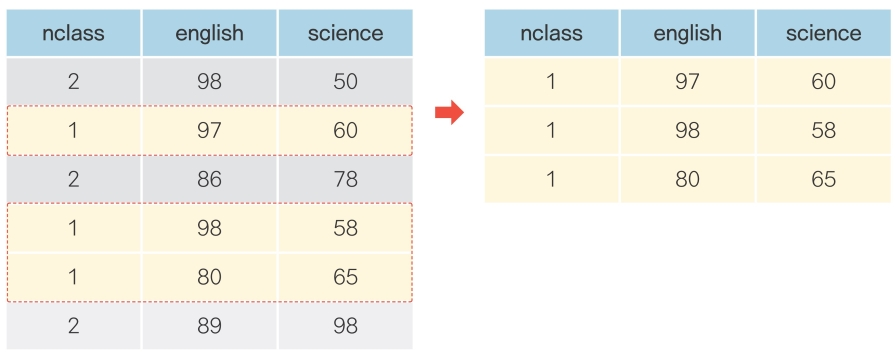

In [5]:
import pandas as pd
exam = pd.read_csv('exam.csv')
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [6]:
# 1반 (nclass == 1) 데이터 추출
exam.query('nclass == 1')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [7]:
# 2반 (nclass == 2) 데이터 추출
exam.query('nclass == 2')

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [8]:
# 1반이 아닌(nclass != 1) 다른 반의 데이터 추출
exam.query('nclass != 1')

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
12,13,4,46,98,65
13,14,4,48,87,12


- 여러 조건을 충족하는 행 추출

In [10]:
exam.query('nclass == 1 & math >= 50')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60


In [11]:
exam.query('english < 90 | science < 50')

,id,nclass,math,english,science
2,3,1,45,86,78
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
13,14,4,48,87,12


> 목록에 해당하면 추출

In [13]:
exam.query('nclass == 1 | nclass == 3 | nclass == 5')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [14]:
exam.query('nclass in [1, 3, 5]')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


> query()로 추출한 행으로 데이터 만들기

In [16]:
nclass1 = exam.query('nclass == 1')
nclass1

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [17]:
nclass2 = exam.query('nclass == 2')
nclass2

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [18]:
nclass1['math'].mean()  # 1반 수학 평균

46.25

In [19]:
nclass2['math'].mean()  # 2반 수학 평균

61.25

> query() - 조건에 맞는 데이터 추출하기 / 문자 변수
- 데이터 값이 문자인 경우 추출하여 작업해보자
- exam.query('nclass == 1')
- df.query(' sex == "F" ')
- df.query(" sex == 'F'  ")

In [21]:
df = pd.DataFrame({'sex' : ['F', 'M', 'F', 'M'],
                   'country' : ['Korea', 'China', 'Japan', 'USA']})
df

,sex,country
0,F,Korea
1,M,China
2,F,Japan
3,M,USA


In [22]:
df.query(' sex == "F" & country == "Korea" ' )

,sex,country
0,F,Korea


In [23]:
df.query(" sex == 'F' & country == 'Korea' " )

,sex,country
0,F,Korea


In [24]:
n = 'F'
df.query('sex == @n')   #  외부 변수 사용

,sex,country
0,F,Korea
2,F,Japan


## Lab2. mpg 데이터 분석 (혼자서해보기, 배포자료 참고)

> Q1 : 자동차 배기량(displ)이 4이하인 자동차와 4초과인 자동차 중 어떤 자동차의 고속도로 연비(hwy)가 높은가 ?

In [27]:
mpg = pd.read_csv('mpg.csv')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [28]:
mpg_lt4 = mpg.query('displ <= 4')
mpg_lt4.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [29]:
mpg_gt4 = mpg.query('displ > 4')
mpg_gt4.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
17,audi,a6 quattro,4.2,2008,8,auto(s6),4,16,23,p,midsize
18,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
20,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
21,chevrolet,c1500 suburban 2wd,5.7,1999,8,auto(l4),r,13,17,r,suv


In [30]:
mpg_lt4['hwy'].mean()

25.96319018404908

In [31]:
mpg_gt4['hwy'].mean()

17.64788732394366

In [32]:
if mpg_lt4['hwy'].mean() > mpg_gt4['hwy'].mean() :
    print('배기량 4 이하 자동차의 고속도로 연비가 높다')
elif mpg_lt4['hwy'].mean() < mpg_gt4['hwy'].mean() :
    print('배기량 4 초과 자동차의 고속도로 연비가 높다')

배기량 4 이하 자동차의 고속도로 연비가 높다


> Q2 : 자동차 회사에 따라 도시 연비가 어떻게 다른가?
- 'audi'와 'toyota' 중 어느 자동차 회사(manufacturer)의 도시 연비가 높은지 알아보기

In [34]:
mpg_audi = mpg.query('manufacturer == "audi"')
mpg_audi.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [35]:
mpg_toyota = mpg.query('manufacturer == "toyota" ')
mpg_toyota.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
173,toyota,4runner 4wd,2.7,1999,4,manual(m5),4,15,20,r,suv
174,toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv
175,toyota,4runner 4wd,3.4,1999,6,auto(l4),4,15,19,r,suv
176,toyota,4runner 4wd,3.4,1999,6,manual(m5),4,15,17,r,suv
177,toyota,4runner 4wd,4.0,2008,6,auto(l5),4,16,20,r,suv


In [36]:
mpg_audi['cty'].mean()

17.61111111111111

In [37]:
mpg_toyota['cty'].mean()

18.529411764705884

> Q3 : 'chevrolet' 'ford' 'honda' 자동차의 고속도로 연비(hwy) 평균을 알아보려고 함

In [39]:
mpg_new = mpg.query("manufacturer in ['chevrolet', 'ford', 'honda']")
mpg_new['manufacturer'].value_counts()

manufacturer
ford         25
chevrolet    19
honda         9
Name: count, dtype: int64

In [40]:
mpg_new['hwy'].mean()

22.50943396226415

## Lab3. 안보고 mpg 데이터 분석 (혼자서 안보고 해보기)

> Q1 : 자동차 배기량(displ)이 4이하인 자동차와 4초과인 자동차 중 어떤 자동차의 고속도로 연비(hwy)가 높은가 ?

> Q2 : 자동차 회사에 따라 도시 연비가 어떻게 다른가?
- 'audi'와 'toyota' 중 어느 자동차 회사(manufacturer)의 도시 연비가 높은지 알아보기

> Q3 : 'chevrolet' 'ford' 'honda' 자동차의 고속도로 연비(hwy) 평균을 알아보려고 함

# 6-3 필요한 변수(컬럼)만 추출하기
## Lab1. 변수(컬럼) 추출
- df['컬럼 이름'] 
- column을 줄이는 과정


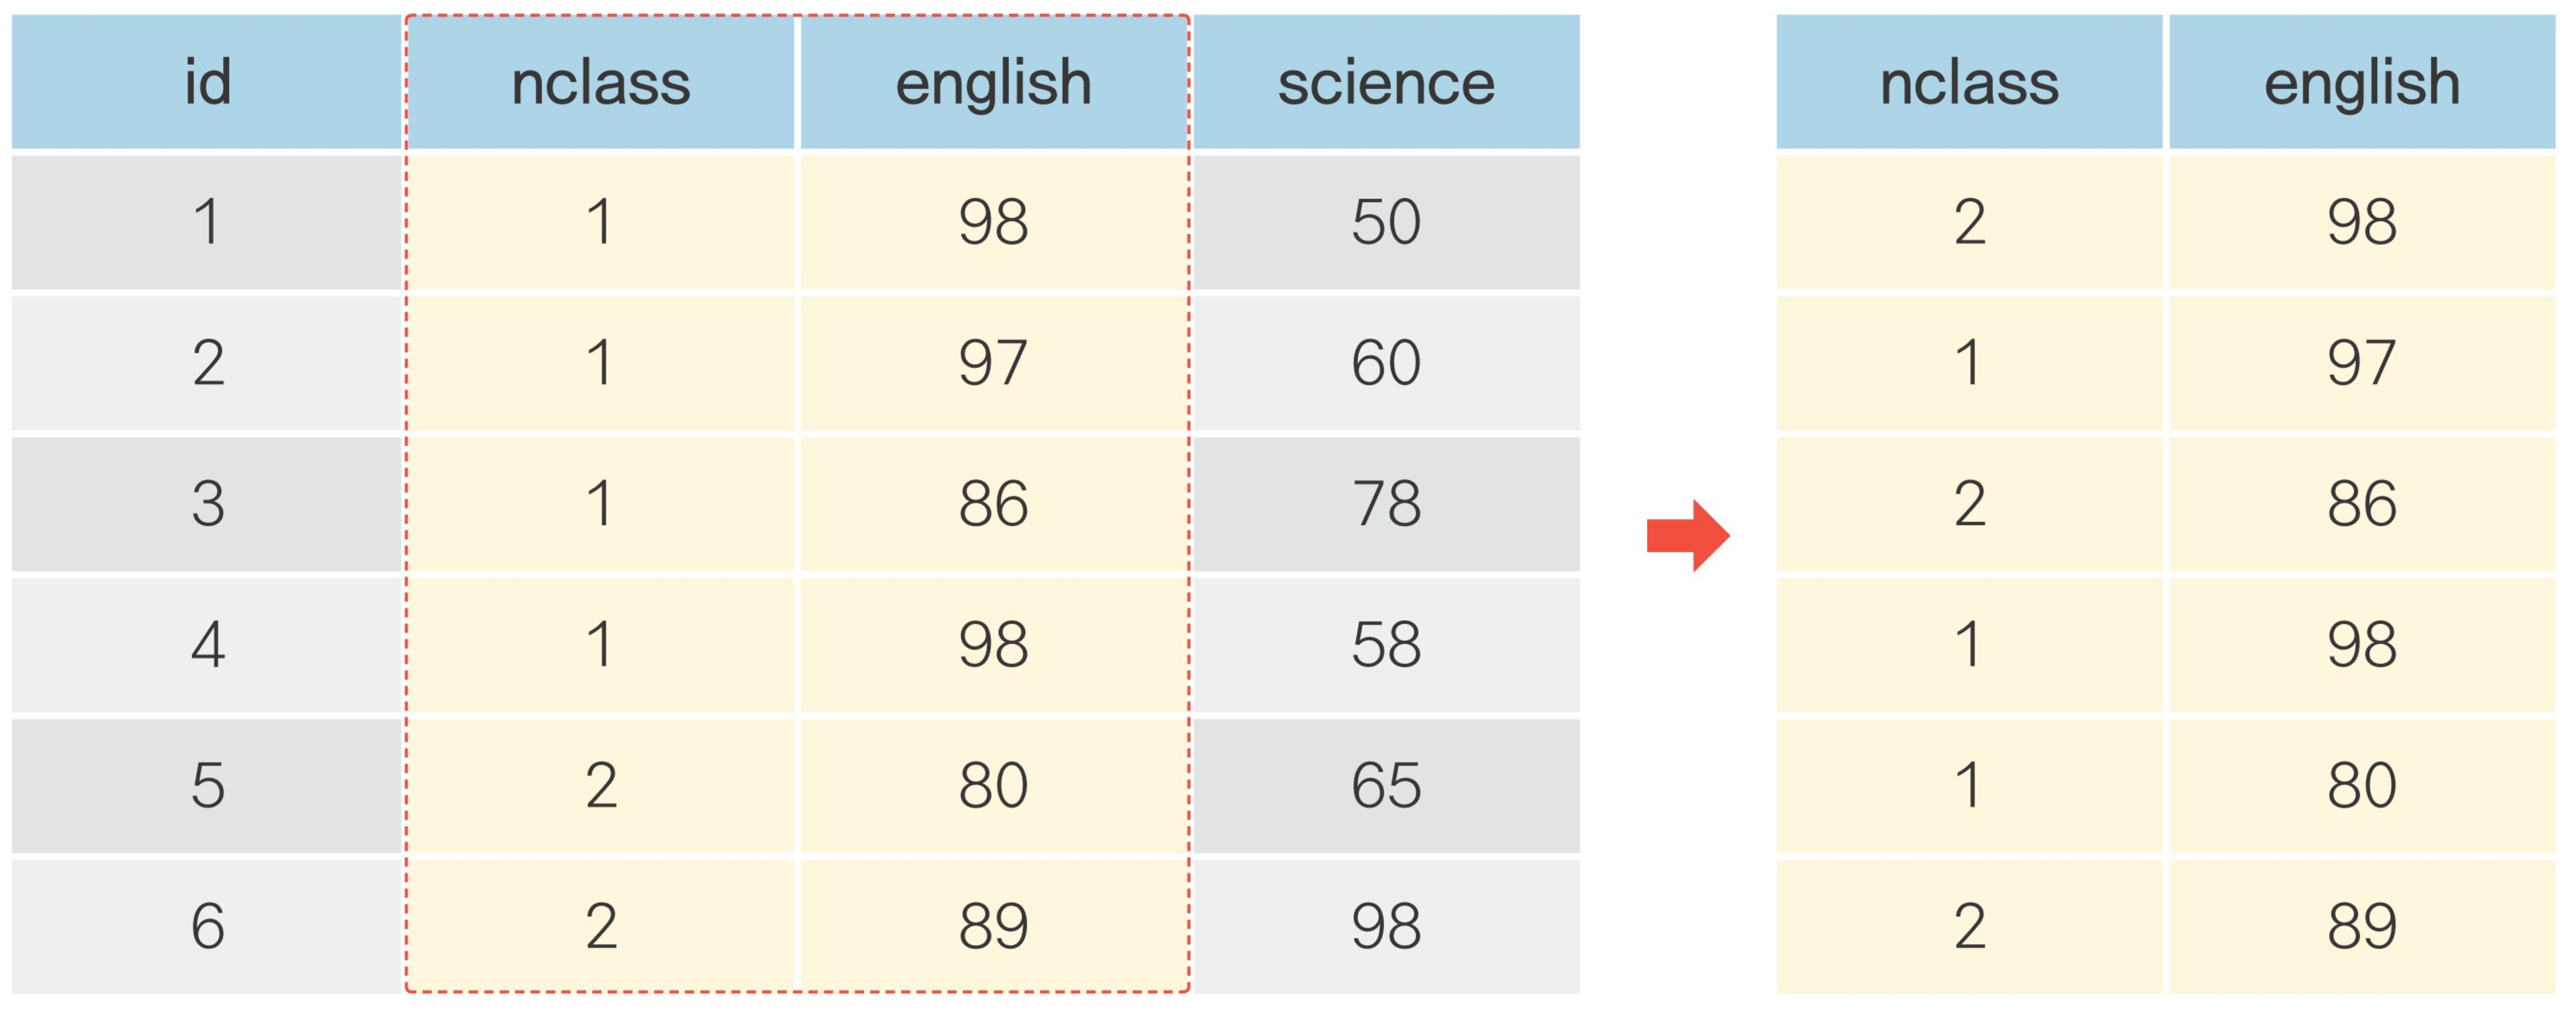

In [46]:
#수학성적 추출
exam['math']  # 시리즈 추출

0     50
1     60
2     45
3     30
4     25
5     50
6     80
7     90
8     20
9     50
10    65
11    45
12    46
13    48
14    75
15    58
16    65
17    80
18    89
19    78
Name: math, dtype: int64

In [47]:
exam[['math']] # 데이터 프레임으로 추출

,math
0,50
1,60
2,45
3,30
4,25
5,50
6,80
7,90
8,20
9,50


In [48]:
exam[['nclass', 'math', 'english']]

,nclass,math,english
0,1,50,98
1,1,60,97
2,1,45,86
3,1,30,98
4,2,25,80
5,2,50,89
6,2,80,90
7,2,90,78
8,3,20,98
9,3,50,98


> 변수 제거하기
- df.drop(columns = '컬럼이름')

In [50]:
# math 제거
exam.drop(columns = 'math')
#exam.drop(columns = 'math', inplace=True)

,id,nclass,english,science
0,1,1,98,50
1,2,1,97,60
2,3,1,86,78
3,4,1,98,58
4,5,2,80,65
5,6,2,89,98
6,7,2,90,45
7,8,2,78,25
8,9,3,98,15
9,10,3,98,45


In [51]:
exam.drop(columns = ['english', 'science'])

,id,nclass,math
0,1,1,50
1,2,1,60
2,3,1,45
3,4,1,30
4,5,2,25
5,6,2,50
6,7,2,80
7,8,2,90
8,9,3,20
9,10,3,50


## Lab2. Pandas 함수 조합하기
> - query()와 [] 조합하기
> - query() - 원하는 조건으로 조회
> - [] -> 해당 column만 출력하기

In [53]:
exam.query('nclass == 1')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [54]:
# nclass == 1 인 결과에서 english column만 가져와라
# 전체 데이터 중에, 1반의 영어 성적만 보고 싶다
exam.query('nclass == 1')['english']   

0    98
1    97
2    86
3    98
Name: english, dtype: int64

In [55]:
exam.query('nclass == 1')[['english']]  # 위와 동일 결과를 데이터 프레임으로 출력

,english
0,98
1,97
2,86
3,98


In [56]:
# 수학 점수 50점 넘는 학생의 학번과 수학점수 출력
exam.query('math >= 50')[['id', 'math']].head(3)

,id,math
0,1,50
1,2,60
5,6,50


## Lab3. mpg 데이터 다루기 (혼자서 해보기. 배포자료 참고 )
- Q1 : mpg 데이터에서 category(자동차 종류)와 cty(도시 연비) 변수(컬럼)을 추출하여 새로운 데이터를 만드시오
- Q2 : 추출한 데이터를 이용하여 category가 'suv'인 자동차와 'compact' 자동차의 도시연비(cty)를 비교해 보시오

#### Q1 : mpg 데이터에서 category(자동차 종류)와 cty(도시 연비) 변수(컬럼)을 추출하여 새로운 데이터를 만드시오

In [59]:
mpg = pd.read_csv('mpg.csv')

In [60]:
mpg_new = mpg[['category', 'cty']]
mpg_new.head(3)

,category,cty
0,compact,18
1,compact,21
2,compact,20


In [61]:
mpg_new['category'].value_counts()

category
suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: count, dtype: int64

#### Q2 : 추출한 데이터를 이용하여 category가 'suv'인 자동차와 'compact' 자동차의 도시연비(cty)를 비교해 보시오

In [63]:
mpg_new.query('category == "suv"')

,category,cty
18,suv,14
19,suv,11
20,suv,14
21,suv,13
22,suv,12
...,...,...
176,suv,15
177,suv,16
178,suv,14
198,suv,11


In [64]:
mpg_new.query('category == "suv"')['cty'].mean()

13.5

In [65]:
mpg_new.query('category == "compact"')['cty'].mean()

20.127659574468087

In [66]:
# mean() 이외에 다른 method를 적용해 보세요. head(), min(), max(), sum()등

## Lab4. mpg 데이터 다루기 (안보고 혼자서 해보기)
- Q1 : mpg 데이터에서 category(자동차 종류)와 cty(도시 연비) 변수(컬럼)을 추출하여 새로운 데이터를 만드시오
- Q2 : 추출한 데이터를 이용하여 category가 'suv'인 자동차와 'compact' 자동차의 도시연비(cty)를 비교해 보시오

# 6-4 순서대로 정렬하기
- df.sort_values()
- df.sort_values('컬럼이름', ascending = True | False)

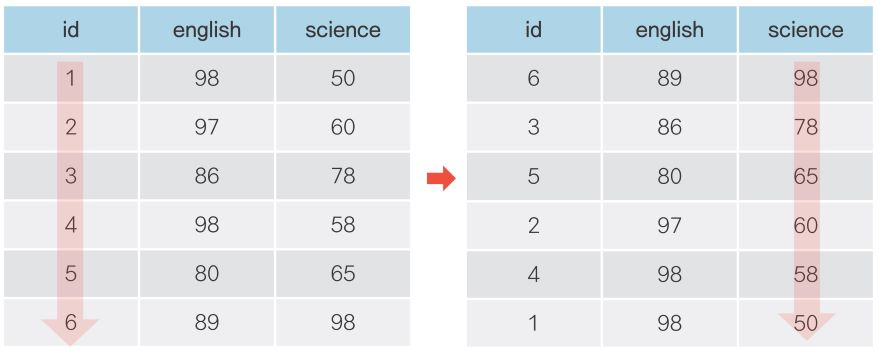

In [69]:
exam = pd.read_csv('exam.csv')

In [70]:
exam.head(10)

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [71]:
# 수학 점수로 정렬, 오름차순
exam.sort_values('math')

,id,nclass,math,english,science
8,9,3,20,98,15
4,5,2,25,80,65
3,4,1,30,98,58
2,3,1,45,86,78
11,12,3,45,85,32
12,13,4,46,98,65
13,14,4,48,87,12
0,1,1,50,98,50
9,10,3,50,98,45
5,6,2,50,89,98


In [72]:
# 수학 점수로 정렬, 내림차순
exam.sort_values('math', ascending=False)

,id,nclass,math,english,science
7,8,2,90,78,25
18,19,5,89,68,87
17,18,5,80,78,90
6,7,2,80,90,45
19,20,5,78,83,58
14,15,4,75,56,78
16,17,5,65,68,98
10,11,3,65,65,65
1,2,1,60,97,60
15,16,4,58,98,65


In [73]:
# nclass, math 오름 차순 정렬
exam.sort_values(['nclass', 'math'])

,id,nclass,math,english,science
3,4,1,30,98,58
2,3,1,45,86,78
0,1,1,50,98,50
1,2,1,60,97,60
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
11,12,3,45,85,32


In [74]:
# nclass 오름 차순, math 내림 차순 정렬
exam.sort_values(['nclass', 'math'], ascending=[True, False])

,id,nclass,math,english,science
1,2,1,60,97,60
0,1,1,50,98,50
2,3,1,45,86,78
3,4,1,30,98,58
7,8,2,90,78,25
6,7,2,80,90,45
5,6,2,50,89,98
4,5,2,25,80,65
10,11,3,65,65,65
9,10,3,50,98,45


## Lab1. mpg 데이터 분석
- Q1 : audi에서 생산한 자동차 중에서 어떤 자동차 모델이 고속도로 연비가 높은가?
- 상위 1위 ~ 5위까지의 자동차 데이터를 출력하시오

In [76]:
mpg = pd.read_csv('mpg.csv')
mpg.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [77]:
mpg.query('manufacturer == "audi"').sort_values('hwy', ascending=False).head(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


# 6.5 파생변수 추가하기
## Lab1. assign() 활용하여 파생변수 추가
- df.assign(컬럼이름 = 함수)


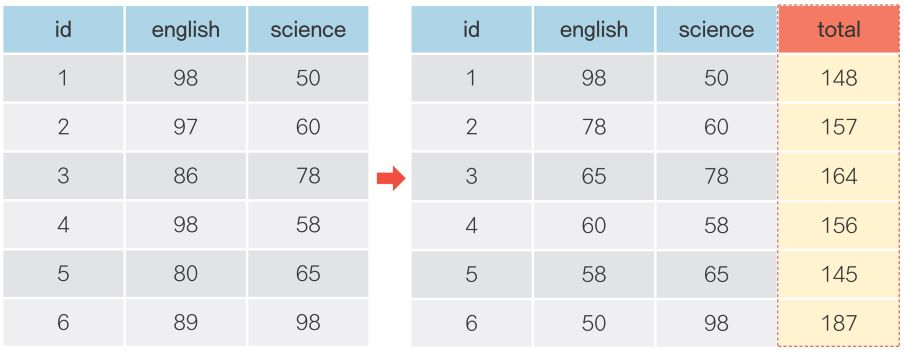

In [79]:
exam = pd.read_csv('exam.csv')
exam.head(3)

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78


In [80]:
exam.assign(total = exam['math'] + exam['english'] + exam['science'])

,id,nclass,math,english,science,total
0,1,1,50,98,50,198
1,2,1,60,97,60,217
2,3,1,45,86,78,209
3,4,1,30,98,58,186
4,5,2,25,80,65,170
5,6,2,50,89,98,237
6,7,2,80,90,45,215
7,8,2,90,78,25,193
8,9,3,20,98,15,133
9,10,3,50,98,45,193


In [81]:
exam.assign(
        total = exam['math'] + exam['english'] + exam['science'],
        mean  = (exam['math'] + exam['english'] + exam['science']) / 3
)

,id,nclass,math,english,science,total,mean
0,1,1,50,98,50,198,66.000000
1,2,1,60,97,60,217,72.333333
2,3,1,45,86,78,209,69.666667
3,4,1,30,98,58,186,62.000000
4,5,2,25,80,65,170,56.666667
5,6,2,50,89,98,237,79.000000
6,7,2,80,90,45,215,71.666667
7,8,2,90,78,25,193,64.333333
8,9,3,20,98,15,133,44.333333
9,10,3,50,98,45,193,64.333333


In [82]:
import numpy as np

In [83]:
exam.assign(test = np.where(exam['science'] > 60, 'pass', 'fail'))

,id,nclass,math,english,science,test
0,1,1,50,98,50,fail
1,2,1,60,97,60,fail
2,3,1,45,86,78,pass
3,4,1,30,98,58,fail
4,5,2,25,80,65,pass
5,6,2,50,89,98,pass
6,7,2,80,90,45,fail
7,8,2,90,78,25,fail
8,9,3,20,98,15,fail
9,10,3,50,98,45,fail


In [84]:
exam.assign(total = exam['math'] + exam['english'] + exam['science'])

,id,nclass,math,english,science,total
0,1,1,50,98,50,198
1,2,1,60,97,60,217
2,3,1,45,86,78,209
3,4,1,30,98,58,186
4,5,2,25,80,65,170
5,6,2,50,89,98,237
6,7,2,80,90,45,215
7,8,2,90,78,25,193
8,9,3,20,98,15,133
9,10,3,50,98,45,193


In [85]:
# 추가한 변수에 pandas 함수를 바로 적용하기
exam.assign(total = exam['math'] + exam['english'] + exam['science']).sort_values('total')

,id,nclass,math,english,science,total
8,9,3,20,98,15,133
13,14,4,48,87,12,147
11,12,3,45,85,32,162
4,5,2,25,80,65,170
3,4,1,30,98,58,186
9,10,3,50,98,45,193
7,8,2,90,78,25,193
10,11,3,65,65,65,195
0,1,1,50,98,50,198
2,3,1,45,86,78,209


## Lab2. lambda를 이용하여 데이터 프레임명 줄이기
- lambda x : 데이터 프레임 자리에 x를 입력한다는 의미
- 코드를 간결하게 사용 가능

In [87]:
exam = pd.read_csv('exam.csv')

In [88]:
exam.assign(total = lambda x : x['math'] + x['english'] + x['science']).head(3)

,id,nclass,math,english,science,total
0,1,1,50,98,50,198
1,2,1,60,97,60,217
2,3,1,45,86,78,209


In [89]:
# 파생 변수 total을 생성하고, 생성한 total을 이용하여 mean을 계산하면 오류 발생

# exam.assign(total = exam['math'] + exam['english'] + exam['science'],
#             mean = exam['total']/3 )

In [90]:
exam.assign(total = exam['math'] + exam['english'] + exam['science'],
            mean = lambda x: x['total']/3 )

,id,nclass,math,english,science,total,mean
0,1,1,50,98,50,198,66.000000
1,2,1,60,97,60,217,72.333333
2,3,1,45,86,78,209,69.666667
3,4,1,30,98,58,186,62.000000
4,5,2,25,80,65,170,56.666667
5,6,2,50,89,98,237,79.000000
6,7,2,80,90,45,215,71.666667
7,8,2,90,78,25,193,64.333333
8,9,3,20,98,15,133,44.333333
9,10,3,50,98,45,193,64.333333


In [91]:
exam.assign(total = lambda x: x['math'] + x['english'] + x['science'],
            mean = lambda x: x['total']/3 )

,id,nclass,math,english,science,total,mean
0,1,1,50,98,50,198,66.000000
1,2,1,60,97,60,217,72.333333
2,3,1,45,86,78,209,69.666667
3,4,1,30,98,58,186,62.000000
4,5,2,25,80,65,170,56.666667
5,6,2,50,89,98,237,79.000000
6,7,2,80,90,45,215,71.666667
7,8,2,90,78,25,193,64.333333
8,9,3,20,98,15,133,44.333333
9,10,3,50,98,45,193,64.333333


## Lab3. mpg 데이터를 이용하여 문제 분석 (혼자해보기, 배포자료 참고)
- Q1 : mpg 사본을 만들고, cty와 hwy를 더한 '함산 연비 변수' total를 추가 하시오
- Q2 : 합산연비 total을 2로 나누어 평균 연비 변수(mean)를 추가 하시오
- Q3 : 평균 연비가 가장 높은 자동차 3종의 데이터를 출력하시오
- Q4 : Q1 ~ Q3까지 하나의 Pandas 구분으로 표현하시오. (mpg 원본 사용)

- Q1 : mpg 사본을 만들고, cty와 hwy를 더한 '함산 연비 변수' total를 추가 하시오

In [94]:
mpg = pd.read_csv('mpg.csv')

In [95]:
mpg_new = mpg.copy()

In [96]:
mpg_new = mpg_new.assign(total = mpg_new['cty'] + mpg_new['hwy'])
mpg_new.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,47
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,50
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,51


- Q2 : 합산연비 total을 2로 나누어 평균 연비 변수(mean)를 추가 하시오

In [98]:
mpg_new = mpg_new.assign(mean = mpg_new['total']/2)
mpg_new.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mean
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,47,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,50,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,51,25.5


- Q3 : 평균 연비가 가장 높은 자동차 3종의 데이터를 출력하시오

In [100]:
# 평균 연비(mean)를 기준으로 내림차순 정렬, 상위 3개 출력
mpg_new.sort_values('mean', ascending=False).head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mean
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,79,39.5
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,77,38.5
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,70,35.0


- Q4 : Q1 ~ Q3까지 하나의 Pandas 구분으로 표현하시오. (mpg 원본 사용)

In [102]:
mpg.assign(total = lambda x: x['cty'] + x['hwy'],
           mean  = lambda x: x['total'] / 2 
          ).sort_values('mean', ascending=False).head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mean
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,79,39.5
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,77,38.5
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,70,35.0


# 6-6 집단별 요약하기 

#### df.groupby()
 
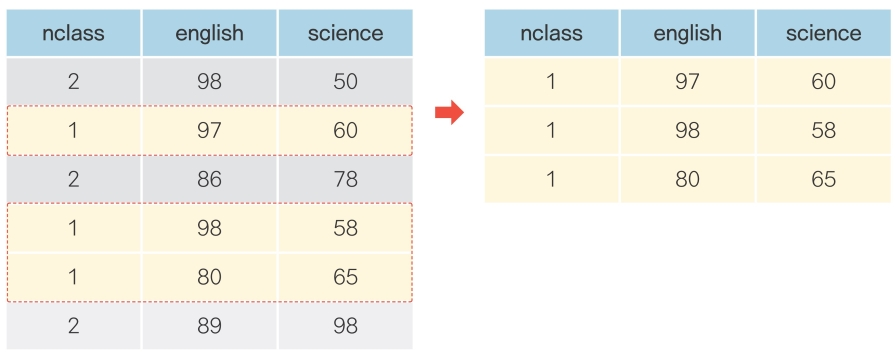

#### .groupby(key).agg(mean = ('data', 'mean')
- 집단별 평균, 집단별 빈도, 집단별 합계 등과 같이 집단별 요약이 필요한 경우 사용
- 집단간 요약표를 통해 집단간 비교가 쉽다

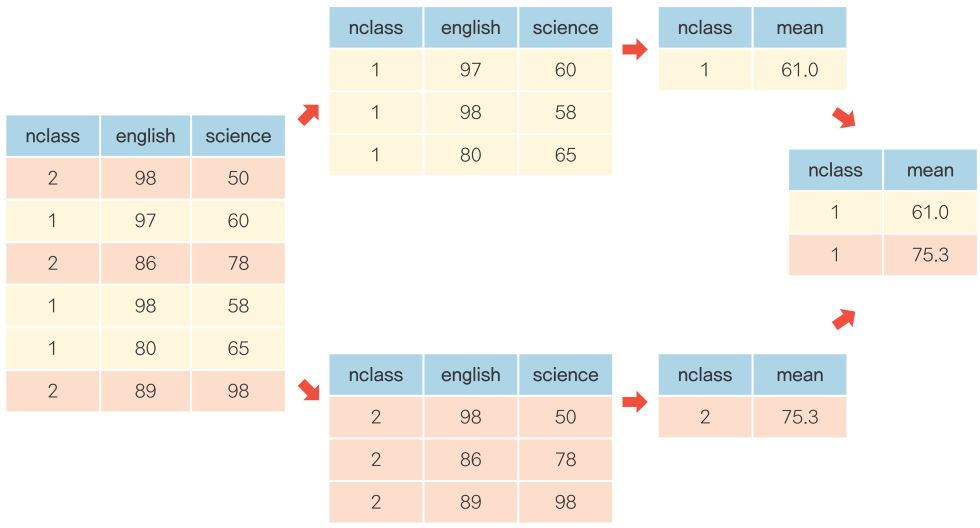


#### .groupby(key).agg(sum_data = ('data', 'sum')

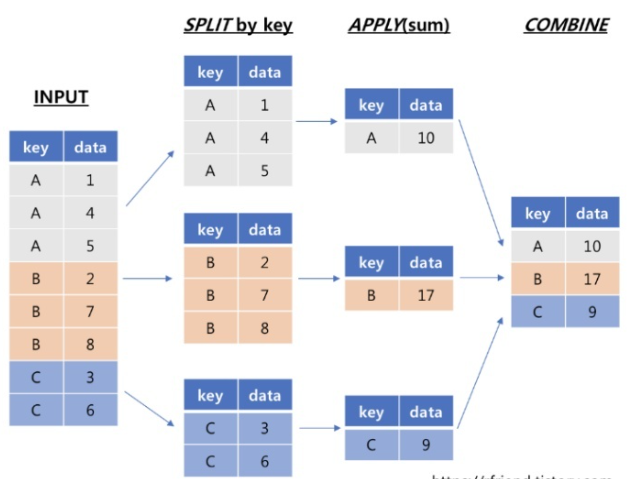

---
## Lab1. 집단별 요약하기

- 요약 통계량 구하기
   
| 함수      |  통계량    |
| ---       |  ----      |
| mean()    | 평균       |
| std()     | 표준편차       |
| sum()     | 합   |
| median()  | 중앙값       |
| min()       | 최소값     |
| max()     | 최대값     |
| count()   | 빈도(개수)     |

### agg()란?
> - aggregate - 통합, 합계 라는 의미 
> - groupby와 함께 사용되어 그룹의 통계를 표현할 때 사용


In [108]:
# Pandas 패키지를 로드
# exam.csv를 데이터 프레임 exam으로 읽어옴
import pandas as pd
exam = pd.read_csv('exam.csv')
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [109]:
# 수학선생님이 수학 점수를 알고 싶다. 통계를 활용하자
exam.mean()

id         10.50
nclass      3.00
math       57.45
english    84.90
science    59.45
dtype: float64

In [110]:
exam['math'].mean()

57.45

In [111]:
#exam.agg(추가하는 변수명 = ('원래 변수명', '함수명'))
#exam.agg(수학평균 = ('math', 'mean'))
exam.agg(new_mean = ('math', 'mean'))

,math
new_mean,57.45


In [112]:
exam.agg(new_mean = ('math', 'mean'),
         eng_mean = ('english', 'mean'),
         sci_max = ('science', 'max')
        )

,math,english,science
new_mean,57.45,NaN,NaN
eng_mean,NaN,84.9,NaN
sci_max,NaN,NaN,98.0


In [113]:
exam['math'].mean()

57.45

### 집단별 요약 통계량 구하기 (groupby())
    1. 반별 수학 점수 평균
    2. exam.groupby('nclass') : 반별(nclass)로 집단을 나누고
    3. exam.groupby('nclass').agg(mean_math = ('math', 'mean')) : 집단별로 mean_math 이름으로 math 변수에 대해 mean(평균) 산출

In [115]:
# 반(nclass)별로 그룹화하고, 그룹별로 변수(컬럼) math에 대한 평균(mean)을 구하고, 
# 변수 이름을 mean_math로 함.
# 기본적으로 nclass가 인덱스가 됨
exam.groupby('nclass').agg(mean_math = ('math', 'mean'))

,mean_math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


- groupby() 함수는 집단을 분류하는 변수(컬럼)가 인덱스로 설정됨
- exam.groupby('nclass').agg(mean_math = ('math', 'mean')) : 반(nclass)가 인덱스가 됨
- 인덱스로 사용하지 않기 위해서는 exam.groupby('nclass', as_index = False)

In [117]:
# 반(nclass)별로 그룹화하고, 
# 그룹별로 변수(컬럼) math에 대한 평균(mean)을 구하고, 
# 변수 이름을 mean_math로 함.
# nclass를 인덱스로 만들지 않음
exam.groupby('nclass', as_index = False).agg(mean_math = ('math', 'mean'))

,nclass,mean_math
0,1,46.25
1,2,61.25
2,3,45.00
3,4,56.75
4,5,78.00


- 집단별 여러 통계량 한꺼 번에 구하기

In [119]:
# 반(nclass)별로 그룹화하고, 그룹별로 
# mean_math 변수에 math에 대한 평균(mean) 값을
# sum_math 변수에 math에 대한 합(sum) 값을 생성함
exam.groupby('nclass') \
    .agg(mean_math = ('math', 'mean'),
         sum_math  = ('math', 'sum'))

,mean_math,sum_math
nclass,,
1,46.25,185
2,61.25,245
3,45.00,180
4,56.75,227
5,78.00,312


In [120]:
# 반(nclass)별로 그룹화하고, 그룹별로 
# mean_math 변수에 math에 대한 평균(mean) 값을
# sum_math 변수에 math에 대한 합(sum) 값을 생성함
# median_math 변수에 math에 대한 중앙값(median) 값을 생성함
# n 변수에 math에 대한 그룹내 개수(count) 값을 생성함

exam.groupby('nclass') \
    .agg(mean_math = ('math', 'mean'),
         sum_math  = ('math', 'sum'),
         median_math = ('math', 'median'),
         n = ('math', 'count')
    )

,mean_math,sum_math,median_math,n
nclass,,,,
1,46.25,185,47.5,4
2,61.25,245,65.0,4
3,45.00,180,47.5,4
4,56.75,227,53.0,4
5,78.00,312,79.0,4


- 모든 변수 통계량 한 번에 구하기

In [122]:
# 반(nclass)별로 그룹화하고, 그룹별로 
# 각 변수에 대한 평균(mean) 값 구하기
exam.groupby('nclass').mean()

,id,math,english,science
nclass,,,,
1,2.5,46.25,94.75,61.50
2,6.5,61.25,84.25,58.25
3,10.5,45.00,86.50,39.25
4,14.5,56.75,84.75,55.00
5,18.5,78.00,74.25,83.25


---
## 혼자 연습

In [124]:
# mpg 데이터로 제조사별로 도심연비의 평균을 구하라
#1) 원하는 결과를 행렬 생성
#2) 결과를 위해서 groupby랑 agg를 사용해서 코드 작성

---
## Lab2. 집단별로 다시 나누기
- 여러 변수를 지정하여 집단을 나누고 다시 하위 변수로 나눌 수 있음
- mpg.groupby(['manufacturer', 'drv']) : 데이터를 제조사(manufactuere)와 구동방식(drv)로 집단을 나누고
- mpg.groupby(['manufacturer', 'drv']).agg(mean_cty = ('cty', 'mean')) : 집단별로cty의 평균(mean)을 구하여 변수 mean_cty이 저장

>
- mpg(mile per gallon) 를 통해 데이터 파악해 보기
- 1999년 ~ 2008년까지 미국에서 출시된 자동차 234종의 정보를 담고 있음
>
- manufacturer : 제조사
- model : 자동차 모델명
- displ : 배기량(cc)
- year : 생산 연도
- cyl : 실린더 수(4기통, 6기통, ...)
- trans : 변속기 종류 - 자동(auto)/수동(manual)
- drv : 구동 방식 (전륜 f, 후륜 r, 4륜 4)
- cty : 도심 주행시 연비 (예: 18마일/갤런)
- hwy : 고속도로 주행시 연비 (예: 18마일/갤런)
- fl : 연료 종류(일반 가솔린 p, 고급 가솔린 r)
- category : 자동차 크기(compact, suv, van, ...)

In [126]:
# mpg.csv 데이터를 데이터 프레임 mpg로 읽어 들임
mpg = pd.read_csv('mpg.csv')

In [127]:
# 데이터 프레임 mpg 데이터 확인
mpg.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [128]:
# 제조사(manufacturer)와 구동방식(drv)별로 그룹화하고, 그룹별로 
# mean_cty 변수에 도시연비 cty에 대한 평균(mean) 값을 구하여 출력
mpg.groupby(['manufacturer', 'drv']).agg(mean_cty = ('cty', 'mean'))

mean_cty
manufacturer drv           
audi         4    16.818182
             f    18.857143
chevrolet    4    12.500000
             f    18.800000
             r    14.100000
dodge        4    12.000000
             f    15.818182
ford         4    13.307692
             r    14.750000
honda        f    24.444444
hyundai      f    18.642857
jeep         4    13.500000
land rover   4    11.500000
lincoln      r    11.333333
mercury      4    13.250000
nissan       4    13.750000
             f    20.000000
pontiac      f    17.000000
subaru       4    19.285714
toyota       4    14.933333
             f    21.368421
volkswagen   f    20.925926

In [129]:
# 제조사(manufacturer)가 audi인 자동차를 대상으로
# 구동방식(drv)에 따라 그룹화하고, 그룹별로 
# n 변수에 구동방식 drv에 대한 그룹네 개수(count) 값을 구하여 출력
mpg.query('manufacturer == "audi"') \
    .groupby(['drv']) \
    .agg(n = ('drv', 'count'))

,n
drv,
4,11
f,7


---
## Lab3. value_counts()로 간단히 집단별 빈도수 구하기

In [131]:
# 구동방식(drv)에 따라 그룹화하고, 그룹별로
# n 변수에 구동방식 drv에 대한 그룹네 개수(count) 값을 구하여 출력
mpg.groupby('drv').agg(n = ('drv', 'count'))

,n
drv,
4,103
f,106
r,25


In [132]:
# 구동방식 drv에 대한 그룹네 개수 값을 구하여 출력
mpg.value_counts('drv')   #  시리즈로 출력

drv
f    106
4    103
r     25
Name: count, dtype: int64

In [133]:
# 구동방식 drv에 대한 그룹네 개수 값을 구하여 출력
mpg.value_counts('drv').to_frame('count') # 데이터 프레임으로 출력 (변수 이름 count)

,count
drv,
f,106
4,103
r,25


In [134]:
# 시리즈 데이터 타입에는 query() 함수를 사용할 수 없음

# mpg.value_counts('drv').query('count > 100')

In [135]:
# 구동방식 drv에 대한 그룹네 개수가 100개 초과인 구동방식(drv)을 구하여 출력
mpg.value_counts('drv').to_frame('count').query('count > 100')

,count
drv,
f,106
4,103


---
## Lab4. mpg 데이터에서 suv 제조사의 합산 평균 연비 상위 1 ~ 5위 제조사 출력하기

1. suv 추출 : query()
2. 합산 연비 변수 만들기 : assign()
3. 회사별 분리 : groupby()
4. 합산 연비 평균 구하기 : agg()
5.  내림차순 정렬하기 : sort_values()
6.  1~5위까지 출력하기 : head()

함수 사용 순서

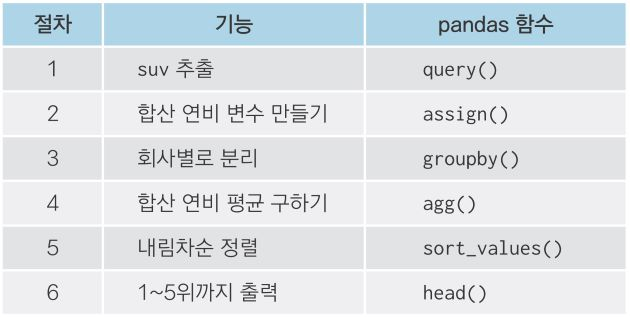

In [137]:
# (1) mpg.csv 파일을 데이터 프레임 mpg로 읽어 들임
mpg = pd.read_csv('mpg.csv')

In [138]:
mpg.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [139]:
# (2) 데이터 프레임 mpg에서 차종(category)가 suv인 자동차만 골라 mpg_new로 생성
mpg_new = mpg.query('category == "suv"')
mpg_new.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
18,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
20,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv


In [140]:
# (3) 데이터 프레임 mpg_new에 도시연비(cty)와 고속도로연비(hwy)의 평균 값을 갖는 파생변수 total 생성
mpg_new = mpg_new.assign(total = (mpg['hwy'] + mpg['cty'])/ 2 )
mpg_new.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total
18,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv,17.0
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv,13.0
20,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv,17.0


In [141]:
# (4) 제조사(manufacturer)에 따라 그룹화하고, 그룹별로
# mean_tot 변수에 통합연비 total에 대한 평균(mean) 값을 구하여 mpg_new에 저장
mpg_new = mpg_new.groupby('manufacturer')\
                .agg(mean_tot = ('total', 'mean'))
mpg_new.head(3)

,mean_tot
manufacturer,
chevrolet,14.888889
dodge,13.928571
ford,15.333333


In [142]:
# (5) mpg_new를 평균 연비 변수 mean_tot 값을 기준으로 내림차순으로 정렬
mpg_new = mpg_new.sort_values('mean_tot', ascending = False)
mpg_new.head(3)

,mean_tot
manufacturer,
subaru,21.916667
toyota,16.312500
nissan,15.875000


In [143]:
# (6) mpg_new 데이터 프레임을 상위 5개 값을 출력
mpg_new.head(5)

,mean_tot
manufacturer,
subaru,21.916667
toyota,16.312500
nissan,15.875000
mercury,15.625000
jeep,15.562500


In [144]:
# 상의 cell의 (1) ~ (6)까지 의 작업을 하나의 구문으로 처리
mpg.query('category == "suv"')\
   .assign(total = (mpg['hwy'] + mpg['cty'])/ 2 )\
   .groupby('manufacturer')\
   .agg(mean_tot = ('total', 'mean'))\
   .sort_values('mean_tot', ascending = False)\
   .head(5)

,mean_tot
manufacturer,
subaru,21.916667
toyota,16.312500
nissan,15.875000
mercury,15.625000
jeep,15.562500


---
## Lab5. 혼자서 해보기(mpg 데이터 분석)

- Q1 : category('suv', compact', ...)별 도시 연비(cty) 평균을 구해 보시오  (groupby() 사용) 

In [147]:
# 데이터 mpg.csv를 데이터 프레임 mpg로 읽어 들임
mpg = pd.read_csv('mpg.csv')

In [148]:
mpg.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [149]:
# 차종(category)에 따라 그룹화하고, 그룹별로
# mean_cty 변수에 도시연비 cty에 대한 평균(mean) 값을 구하여 출력

## mpg.groupby('      ').agg(mean_cty = ('     ', '       '))

- Q2 : category별 평균 도시연비(cty)가 높은 기준으로 정열

In [151]:
# 차종(category)에 따라 그룹화하고, 그룹별로
# mean_cty 변수에 도시연비 cty에 대한 평균(mean) 값을 구한 다음
# 차종별 도시 평균 연비 mean_cty의 값에 따라 내림 차순으로 정렬
mpg.groupby('category').agg(mean_cty = ('cty', 'mean')).sort_values('mean_cty', ascending=False)

,mean_cty
category,
subcompact,20.371429
compact,20.127660
midsize,18.756098
minivan,15.818182
2seater,15.400000
suv,13.500000
pickup,13.000000


- Q3 : 자동차의 평균 고속도로 연비(hwy)가 높은 3개 회사 출력

In [153]:
# 제조사(manufacturer)에 따라 그룹화하고, 그룹별로
# mean_hwy 변수에 고속도로연비 hwy에 대한 평균(mean) 값을 구함

## mpg.groupby('       ').agg(mean_hwy = ('      ', '       '))

In [154]:
# 제조사(manufacturer)에 따라 그룹화하고, 그룹별로
# mean_hwy 변수에 고속도로연비 hwy에 대한 평균(mean) 값을 구한 다음
# 제조사별 고속도로 평균 연비 mean_hwy의 값에 따라 내림 차순으로 정렬하고
# 상위 3개 회사 정보 출력

## mpg.groupby('          ') \
##   .agg(mean_hwy = ('     ', '      ')) \
##   .sort_values('mean_hwy', ascending=        ) \
##   .head(3)

- Q4 : compact 차종을 가장 많이 생산하는 회사를 출력

In [156]:
# compact 차종 데이터만 추출
mpg.query('category == "compact"').head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [157]:
# compact 차종 데이터만 추출하여 데이터 프레임 mpg_new에 저장
mpg_new = mpg.query('category == "compact"')

In [158]:
# 제조사(manufacturer)에 따라 그룹화하고, 그룹별로
# count_compact 변수에 차종(category)별 개수(count) 값을 저장하여 출력

mpg_new.groupby('manufacturer') \
       .agg(count_compact = ('category', 'count'))

,count_compact
manufacturer,
audi,15
nissan,2
subaru,4
toyota,12
volkswagen,14


In [159]:
# 제조사(manufacturer)에 따라 그룹화하고, 그룹별로
# count_compact 변수에 차종(category)별 개수(count) 값을 저장하고
# 차종별 개수 count_compact 값에 따라 내림 차순으로 정렬 

## mpg_new.groupby('        ') \
##       .agg(count_compact = ('        ', '        ')) \
##       .sort_values('count_compact', ascending=      )

In [160]:
# 제조사(manufacturer)에 따라 그룹화하고
# 제조사에 따른 그룹별 개수를 출력
mpg_new.value_counts('manufacturer')

manufacturer
audi          15
volkswagen    14
toyota        12
subaru         4
nissan         2
Name: count, dtype: int64

---
# 6-7 데이터 합치기
#### 가로로 합치기 : merge()
 
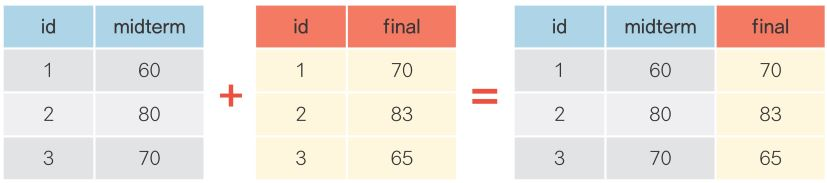 

#### 세로로 합치기 : concat()  
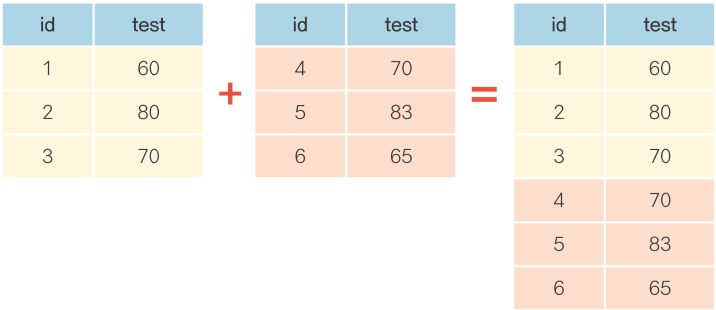

---
## Lab1. 가로로 합치기

In [163]:
# 중간고사
test1 = pd.DataFrame( {'id' : [1, 2, 3, 4, 5],
                       'midterm' : [60, 80, 70, 90, 85]
                      })

In [164]:
test1

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85


In [165]:
# 기말고사
test2 = pd.DataFrame( {'id' : [1, 2, 3, 4, 5],
                       'finalterm' : [70, 83, 65, 95, 80]
                      })

In [166]:
test2

,id,finalterm
0,1,70
1,2,83
2,3,65
3,4,95
4,5,80


In [167]:
total = pd.merge(test1, test2, how = 'left', on = 'id')

In [168]:
total

,id,midterm,finalterm
0,1,60,70
1,2,80,83
2,3,70,65
3,4,90,95
4,5,85,80


- 다른 데이터를 활용하여 변수 추가하기 

In [170]:
# 반별 담임 선생님
name = pd.DataFrame({'nclass' : [1, 2, 3, 4, 5],
                     'teacher' : ['kim', 'lee', 'park', 'choi', 'jung']
                    })
name

,nclass,teacher
0,1,kim
1,2,lee
2,3,park
3,4,choi
4,5,jung


In [171]:
exam.head(3)

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78


In [172]:
exam_new  = pd.merge(exam, name, how = 'left', on='nclass')
exam_new

,id,nclass,math,english,science,teacher
0,1,1,50,98,50,kim
1,2,1,60,97,60,kim
2,3,1,45,86,78,kim
3,4,1,30,98,58,kim
4,5,2,25,80,65,lee
5,6,2,50,89,98,lee
6,7,2,80,90,45,lee
7,8,2,90,78,25,lee
8,9,3,20,98,15,park
9,10,3,50,98,45,park


## 가로로 합치기(merge()) 

### 기준열 이름이 같을 때
- pd.merge(left, right, on = '기준열', how = '조인방식')

### 기준열 이름이 다를 때
- pd.merge(left, right, left_on = '왼쪽 열', right_on = '오른쪽 열', how = '조인방식')

### 속성
- left : 왼쪽 데이터프레임
- right : 오른쪽 데이터프레임
- on : (두 데이터프레임의 기준열 이름이 같을 때) 기준열
- how : 조인 방식 {'left', 'right', 'inner', 'outer'} 기본값은 'inner'
- left_on : 기준열 이름이 다를 때, 왼쪽 기준열
- right_on : 기준열 이름이 다를 때, 오른쪽 기준열
 
 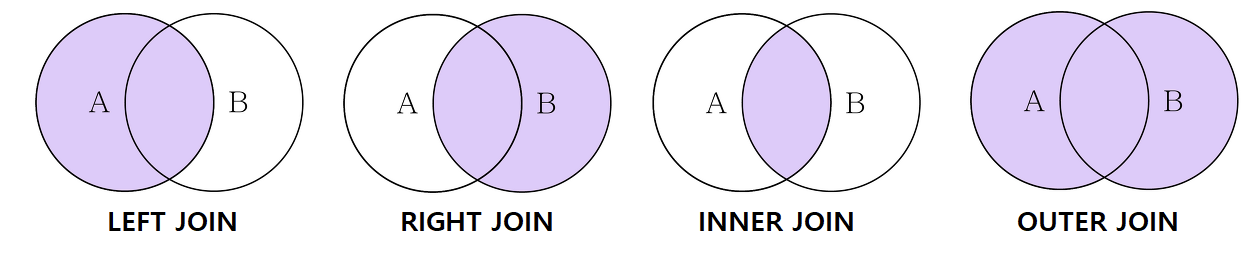

In [174]:
import pandas as pd
fruit = pd.DataFrame({'Num':[123, 456, 789, 1011, 1112], 'Fruit':['Apple', 'Banana', 'Cherry', 'Lemon', 'Peach']})
grade = pd.DataFrame({'Num':[123, 789, 1314], 'Grade':['A', 'B', 'C']})
fruit

,Num,Fruit
0,123,Apple
1,456,Banana
2,789,Cherry
3,1011,Lemon
4,1112,Peach


In [175]:
grade

,Num,Grade
0,123,A
1,789,B
2,1314,C


In [176]:
#Left Join
#: 왼쪽 데이터프레임을 기준으로 조인한다. 오른쪽 데이터프레임에 없는 값은 NaN으로 나타난다.
pd.merge(fruit, grade, on = 'Num', how = 'left')

,Num,Fruit,Grade
0,123,Apple,A
1,456,Banana,NaN
2,789,Cherry,B
3,1011,Lemon,NaN
4,1112,Peach,NaN


In [177]:
#Right Join
#: 오른쪽 데이터프레임을 기준으로 조인한다. 왼쪽 데이터프레임에 없는 값은 NaN으로 나타난다.

pd.merge(fruit, grade, on = 'Num', how = 'right')

,Num,Fruit,Grade
0,123,Apple,A
1,789,Cherry,B
2,1314,NaN,C


In [178]:
#Inner Join
#: 교집합을 의미한다. 양쪽에 공통으로 있는 값만 나타난다. 
pd.merge(fruit, grade, on = 'Num', how = 'inner')


,Num,Fruit,Grade
0,123,Apple,A
1,789,Cherry,B


In [179]:
#Outer Join
#: 모든 값이 나타나도록 한다. 왼쪽 데이터프레임과 오른쪽 데이터프레임에 없는 값들은 NaN으로 나타난다.
pd.merge(fruit, grade, on = 'Num', how = 'outer')


,Num,Fruit,Grade
0,123,Apple,A
1,456,Banana,NaN
2,789,Cherry,B
3,1011,Lemon,NaN
4,1112,Peach,NaN
5,1314,NaN,C


---
## Lab2. 세로로 합치기 (concat())
- 시험을 5명씩 2번에 걸쳐 보아서 두개의 DataFrame이 존재한다.
- 두 데이터의 컬럼의 이름이 동일해야 한다

In [181]:
group_a = pd.DataFrame({'id' : [1, 2, 3, 4, 5],
                        'test' : [60, 80, 70, 90, 85]
                       })

In [182]:
group_b = pd.DataFrame({'id' : [6, 7, 8, 9, 10],
                        'test' : [70, 83, 65, 95, 80]
                       })

In [183]:
group_a

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85


In [184]:
group_b

,id,test
0,6,70
1,7,83
2,8,65
3,9,95
4,10,80


In [185]:
group_all = pd.concat([group_a, group_b])
group_all

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
0,6,70
1,7,83
2,8,65
3,9,95
4,10,80


In [186]:
group_all = pd.concat([group_a, group_b], ignore_index=True)
group_all

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
5,6,70
6,7,83
7,8,65
8,9,95
9,10,80


### concat()은 반드시 column이 동일해야 하나요?

In [188]:

group_c = pd.DataFrame({'id' : [16, 17, 18, 19, 20],
                        'test' : [70, 83, 65, 95, 80],
                        'grade' : ['a', 'b','b','a','c']
                       })
group_c

,id,test,grade
0,16,70,a
1,17,83,b
2,18,65,b
3,19,95,a
4,20,80,c


In [189]:
group_all2 = pd.concat([group_all, group_c])
group_all2

,id,test,grade
0,1,60,NaN
1,2,80,NaN
2,3,70,NaN
3,4,90,NaN
4,5,85,NaN
5,6,70,NaN
6,7,83,NaN
7,8,65,NaN
8,9,95,NaN
9,10,80,NaN


---
## Lab3. 혼자서 해보기

- 연료 종류별 가격(갤런당 USD) 데이터를 가지고 mpg 데이터를 분석해보시오

|  fl     |   가격(price_fl)  |  비고     |
|---      | ----              | ----      |
| c       | 2.35              | CNG       |
| d       | 2.38              | diesel    |
| e       | 2.11              | ethanol E85    |
| p       | 2.76              | premium    |
| r       | 2.22              | regular    |


- Q0 : 연료 종류별 데이터로 fuel 데이터 프레임을 생성 하시오

In [192]:
fuel = pd.DataFrame({'fl' : ['c', 'd', 'e', 'p', 'r'],
                     'price_fl' : [2.35, 2.38, 2.11, 2.76, 2.22]
                    })
fuel

,fl,price_fl
0,c,2.35
1,d,2.38
2,e,2.11
3,p,2.76
4,r,2.22


- Q1 : fuel 데이터를 이용하여 mpg 데이터에 price_fl(연료 가격)을 추가 하시오

In [194]:
mpg = pd.read_csv('mpg.csv')
mpg.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [195]:
mpg = pd.merge(mpg, fuel, how='left', on='fl')
mpg.head(20)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,price_fl
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,2.76
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,2.76
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,2.76
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,2.76
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,2.76
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,2.76
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact,2.76
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact,2.76
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact,2.76
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact,2.76


- Q2 : 자동차 모델별로 연료 가격을 확인하기 위해 model, fl, price_fl 변수를 추출하여 앞 부분 5개 행을 출력 하시오

In [197]:
mpg[['model', 'fl', 'price_fl']].head(5)

,model,fl,price_fl
0,a4,p,2.76
1,a4,p,2.76
2,a4,p,2.76
3,a4,p,2.76
4,a4,p,2.76


---
## Lab4. 분석 도전
1. 미국 동북중부 437개 지역의 인구 통계를 담고 있는 midwest.csv를 사용하여 분석
2. 컬럼(변수)의 이름과 변수의 타입 등 파악 (midwest.info())
- poptotal : 해당 지역(state/county)의 총 인구 수
- popasian : 해당 지역(state/county)의 아시아계 인구 수
- popadults : 해당 지역(state/county)의 성인 인구 수
- 전체 인구 대비 미성년 인구 백분율 = (poptotal - popadults) / poptotal * 100
- 전체 인구 대비 아시안 인구 백분율 = popasian / poptotal * 100

In [199]:
# 미국 동북중부 437개 지역의 인구 통계 데이터 midwest.csv 읽어 오기
midwest = pd.read_csv('midwest.csv')
midwest.head(3)

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,19.631392,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,11.243308,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,17.033819,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR


> Q1 : popadults는 해당지역 성인인구 수, poptotal은 전체 인구를 나타냄
- 해당 지역별 '전체 인구 대비 미성년 인구 백분율' 변수 ratio를 추가 하시오

In [201]:
# '전체 인구 대비 미성년 인구 백분율'인 파생 변수 ratio를 추가

## midwest['ratio'] = (midwest['       '] - midwest['       ']) / midwest['       '] * 100
## midwest.head(3)

In [202]:
# 미국 동북중부 437개 지역의 인구 통계 데이터 midwest에서 변수 county, state, ratio 값만 출력
# midwest[['county', 'state', 'ratio']].head(3)

> Q2 : 미성년 비율이 높은 상위 5개 지역(county, state)의 미성년 인구 백분율을 출력 하시오 

In [204]:
# '전체 인구 대비 미성년 인구 백분율'인 파생 변수 ratio 값에 따라 내림차순 정렬
# 상위 5개 지역 출력

## midwest.sort_values('         ', ascending=       ).head()[['state', 'county', 'ratio']]

> Q3 : 분류 기준표에 따라 미성년 비율 등급 변수(grade)를 추가하고, 각 등급에 몇개 지역이 있는지 알아보기

| 분류 (grade)  |  기준    |
| ----          | ---      |
| large         | 40% 이상 |
| middle        | 30~40% 미만   |
| small         | 30% 미만  |

In [206]:
# np.where() 연산 등을 수행하기 위해 numpy 패키지 로딩
#import numpy as np

In [207]:
# ratio(전체 인구 대비 미성년 인구 백분율)이 40 이상이면 large
#                                           30 이상이면 middle
#                                           30 미만이면 small
# 값을 갖는 파생변수 grade 추가
#midwest['grade'] = np.where(midwest['ratio'] >= 40, 'large',
#                   np.where(midwest['ratio'] >= 30, 'middle', 'small' ))
#midwest.head()[['county', 'ratio', 'grade']]

In [208]:
# grade 등급에 따라 그룹을 나누고, 그룹별로 
# count_grade 변수에 등급(grade)별 개수(count)를 구함
#midwest.groupby('grade').agg(count_grade = ('grade', 'count'))

> Q4 : popasian은 해당 지역의 아시아인 인구를 나타냅니다, 지역별 전체 인구 대비 아시아인 인구 백분율을 추구하고 하위 10개 지역(county, state)의 아시아인 백분율을 출력하시오

In [210]:
# 지역별 전체 인구 대비 아시아인 인구 백분율구하고,
# 파생변수 ratio_asian에 저장

## midwest.assign(ratio_asian = midwest['     ']/midwest['        '] * 100)

In [211]:
# 지역별 전체 인구 대비 아시아인 인구 백분율구하고,
# 파생변수 ratio_asian에 저장
# ratio_asian(지역별 전체 인구 대비 아시아인 인구 백분율) 값을 기준으로 정렬(오름 차순)하고
# 하위 10개 지역 출력

## midwest.assign(ratio_asian = midwest['popasian']/midwest['poptotal'] * 100)\
##       .sort_values('        ')\
##       .head(10)[['state', 'county','ratio_asian']]

---
# 1분만에 데이터분석 마스터하기!

In [213]:
 
mpg.query('category == "suv"')\
   .assign(total = (mpg['hwy'] + mpg['cty'])/ 2 )\
   .groupby('manufacturer')\
   .agg(mean_tot = ('total', 'mean'))\
   .sort_values('mean_tot', ascending = False)\
   .head(5)

,mean_tot
manufacturer,
subaru,21.916667
toyota,16.312500
nissan,15.875000
mercury,15.625000
jeep,15.562500
